# 1. Import and warehouse data:

In [1]:
#1)Import the required libraries.
import numpy as np
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')



In [2]:
#2)Create a database in MYSQL server using MYSQL workbench and Import the datasets ‘TelecomCustomerChurn1’ and ‘TelecomCustomerChurn2’ in it.
#3)Connect to DB using mysql-connector-python package
import mysql.connector as my_con
MYSQL_Connection = my_con.connect(user ='root',
            password= '123456789', ##Give your password
            host= 'localhost',
            database= 'telecom')

print(MYSQL_Connection)


#df_1 = pd.read_sql('SELECT * FROM telcomcustomerchurn1', con='MYSQL_Connection')
#df_2 = pd.read_sql('SELECT * FROM telcomcustomerchurn2', con='MYSQL_Connection')

#when I used the above function to import tables from MySQL after connecting to the database in MySQL , I'm getting an error that could'nt 
#be resolved. So I had to use the pd.read_csv to read the data.

In [3]:
#4)Import all the given datasets from MYSQL server and Explore shape and size
df1=pd.read_csv("C:\\Users\\suhas\\Downloads\\TelcomCustomer-Churn_1.csv")
df2=pd.read_csv("C:\\Users\\suhas\\Downloads\\TelcomCustomer-Churn_2.csv")

In [4]:
#5)Merge all datasets onto one and explore final shape and size
df = pd.concat([df1, df2],axis=1)

In [5]:
df.shape
#The above code shows that there are 7043 records(rows) and 22 columns in total

(7043, 22)

In [6]:
df.size

154946

# 2.Data cleansing and Exploratory data analysis:

In [7]:
#Data cleaning
#1)Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.
df.isnull().sum()
#There are no missing values in the datadframe.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
customerID          0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#2)Check if there are any duplicate records in the dataset? If any drop them
df.duplicated()
#There are no duplicate records in the dataframe

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [9]:
#3)Drop the columns which you think redundant for the analysis
df.drop('customerID',axis=1,inplace=True)
#Here we've dropped the column -CustomerID as it's os no use

In [10]:
#4)Encode the categorical variables
#Encoding target variable('Churn') from object into numerical values using labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Churn'] = le.fit_transform(df['Churn'])
df['Churn']



0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [11]:
#Let's check if target variable is converted to numerical values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
#5)Write all the above steps in functions for modularity
#Steps
#1)df.isnull().sum()- To check for the presence of missing values
#2)df.duplicated()-To check for the presence of duplicate records
#3)df.drop()-To drop redundent columns
#4)df[x] = le.fit_transform(df[x].astype(str))-To encode the categorical variables using labelencoder

In [13]:
#Exploratory Data Analysis:

#1)Perform detailed statistical analysis on the data.
df.describe()
#The above function gives the insights for all numerical records present in the dataframe,
#eg- Monthly charges 
#count-There are 7043 records in total
#mean-Average Monthly charges is 64k
#min-The minimum Monthly charges is 18k
#max-The maximum Monthly charges is 118k
#Standard deviation-30
#25%,50%,75% represents the 1st,2nd and 3rd quartile respectively

,SeniorCitizen,tenure,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370
std,0.368612,24.559481,30.090047,0.441561
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,0.000000
50%,0.000000,29.000000,70.350000,0.000000
75%,0.000000,55.000000,89.850000,1.000000
max,1.000000,72.000000,118.750000,1.000000


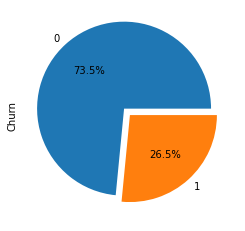

In [14]:
#2)Perform a detailed univariate, bivariate, and multivariate analysis with appropriate detailed comments after each analysis
#Univariate analysis

#The distribution of the target variable(Churn)
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%',explode=[0.1,0])
plt.show()

#This pie chart shows that around 73% of customers have churned within the last month and 26% of the customers have not churned.

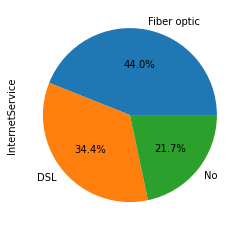

In [15]:
#The percentages of internet services used by customers
df['InternetService'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

#This pie chart tells that 44% of customers use fiber optic and 34% of customers use DSL and 21% don't use any internet service

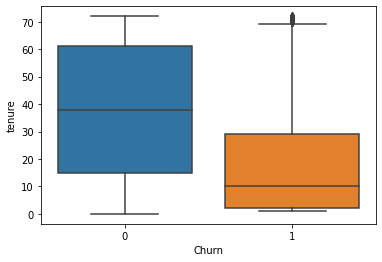

In [16]:
#Bivariate analysis
#1)variation of  Customers churn with time
sns.boxplot(x = 'Churn',y = 'tenure',data = df)
plt.show()

#This plot gives us information about how long they have been a customer,People who have been visited the store for more than 30 times(days) are
# not likely to use companany's services whereas customers with less than 30 times(new customers and ocassionally visiting customers)
#of tenure are likely to drop.

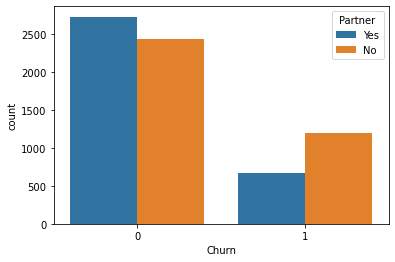

In [17]:
#2)How customers having partners will impact Churning
sns.countplot(x = 'Churn',hue= 'Partner', data = df)
plt.show()

#Among customers who churn, 2500 of them are partners and 2300 customers aren't partners.
#Among those customers who are not likely to Churn, 700 of them are partners and 1000 customers aren't partners.

In [18]:
#Converting all object datatype columns to numerical datatype for multivariate analysis using Labelencoding

df_categorical = df[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn']]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in df_categorical:
    df[x] = le.fit_transform(df[x].astype(str))



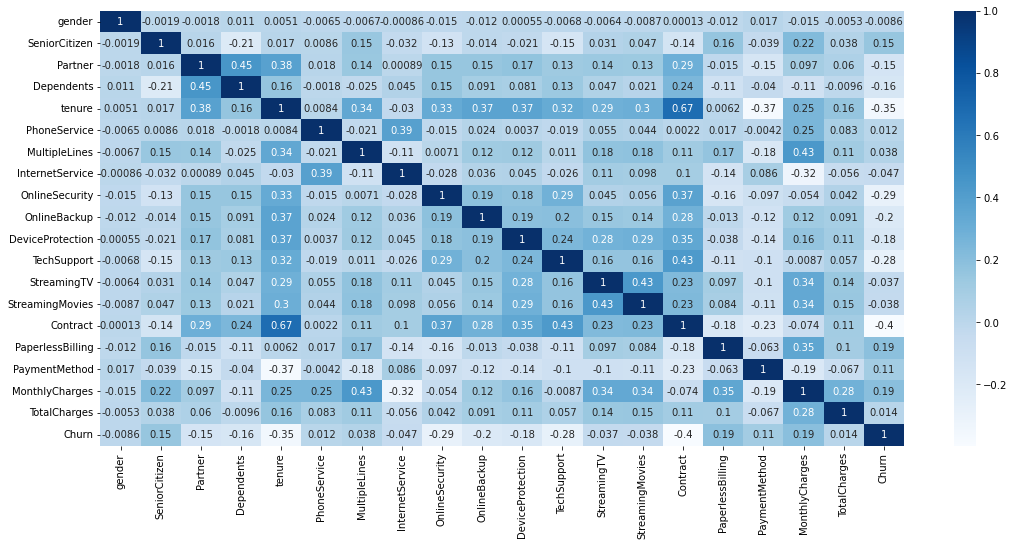

In [19]:
#Multivariate analysis using heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

#These plots shows how 'churn' is corelated with different attributes.
#Monthly charges and tenure affect customers  the most.
#Senior citizen,paperlessbilling,monthlycharges,paymentmethods are the columns that are highly corelated with churn
#Tenure,onlinesecurity,contract have least impact on churn

# 3.Data Preparation for model building:

In [20]:
#1) Store the target column (i.e. Churn) in the y variable and the rest of the columns in the X variable
X = df.drop('Churn',axis=1)
Y = df['Churn']

In [21]:
#2)Split the dataset into two parts (i.e. 70% train and 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(4930, 19) (2113, 19)
(4930,) (2113,)


In [22]:
#3)Standardize the columns using z-score scaling approach
df = df.select_dtypes(include='number').apply(stats.zscore)
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.398608,-0.601023
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.948762,-0.601023
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.641883,1.663829
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.983710,-0.601023
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.235224,1.663829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.879397,-0.601023
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.292099,-0.601023
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.139680,-0.601023
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.316534,1.663829


# 4. Model training, and testing:

In [23]:
#1)Train and test Logistic regression, KNN, and Naive Bayes models taught in the learning module.
#Logistic regression
ss = StandardScaler()

X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

#reshape x and y to 1D Arrays
x = np.linspace(0, 2*np.pi, 8)
y = np.sin(x) + np.random.normal(0, 0.4, 8)

x = x.reshape(-1, 1)







In [24]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)






LogisticRegression()

In [25]:
#Calculating predicted values for both test and train data
y_test_pred = log_reg.predict(X_test)
y_train_pred=log_reg.predict(X_train)




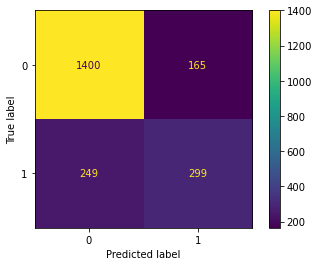

In [26]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test, Y_test)  
plt.show()

In [27]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1565
           1       0.64      0.55      0.59       548

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



In [28]:
#Calculating the accuracy score for lenear regression
print(accuracy_score(Y_test,y_test_pred))



0.804070042593469


In [29]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [30]:
#Calculating predicted values for both test and train data
y_test_pred_knn = knn.predict(X_test)
y_train_pred_knn=knn.predict(X_train)


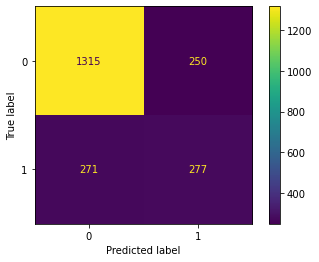

In [31]:
## Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()

In [32]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1565
           1       0.53      0.51      0.52       548

    accuracy                           0.75      2113
   macro avg       0.68      0.67      0.68      2113
weighted avg       0.75      0.75      0.75      2113



In [33]:
#Calculating the accuracy score for KNN Classifier
print('accuracy:',accuracy_score(Y_test,y_test_pred_knn))


accuracy: 0.7534311405584477


In [34]:
#Naive bayes Classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [35]:
#Calculating predicted values for both test and train data
y_test_pred_gnb = gnb.predict(X_test)
y_train_pred_gnb = gnb.predict(X_train)

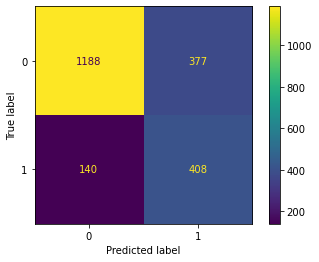

In [36]:
#Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, Y_test)  
plt.show()

In [37]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_test_pred_gnb))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1565
           1       0.52      0.74      0.61       548

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.80      0.76      0.77      2113



In [38]:
#Calculating the accuracy score for naive bayes classifier
print('accuracy:',accuracy_score(Y_test,y_test_pred_gnb))


accuracy: 0.7553241836251775


In [39]:
#2)Display the classification accuracies for train and test data.

In [40]:
#Linear regression
print(accuracy_score(Y_test,y_test_pred))
print(accuracy_score(Y_train,y_train_pred))

0.804070042593469
0.803448275862069


In [41]:
#KNN
print('accuracy:',accuracy_score(Y_test,y_test_pred_knn))
print('accuracy:',accuracy_score(Y_train,y_train_pred_knn))

accuracy: 0.7534311405584477
accuracy: 0.831237322515213


In [42]:
#Naive bayes
print('accuracy:',accuracy_score(Y_test,y_test_pred_gnb))
print('accuracy:',accuracy_score(Y_train,y_train_pred_gnb))

accuracy: 0.7553241836251775
accuracy: 0.7561866125760649


In [43]:
#3)Display and compare all the models designed with their train and test accuracies.
### Comparison of Naive bayes classifier model and KNN classfier model
print('Linear regression-accuracy:',accuracy_score(Y_test,y_test_pred))
print('Naive Bayes model - accuracy:',accuracy_score(Y_test,y_test_pred_gnb))
print('KNN with optimal K - accuracy:',accuracy_score(Y_test,y_test_pred_knn))


Linear regression-accuracy: 0.804070042593469
Naive Bayes model - accuracy: 0.7553241836251775
KNN with optimal K - accuracy: 0.7534311405584477


In [44]:
### 4)Select the final best trained model along with your detailed comments for selecting this model.

#From the above test results we can see that linear regressions gives the best accuracy while testing as well as training
# with an accuracy score of 80%(test) and 80%(train), whereas KNN gives out acuracy score of 75%(test) and 83%(train), Naive bayes 
#has accuracy score of 75%(test) and 75%(train)  which is lower than that of linar algorithom.Even though KNN gives 83% accuracy
#for training data,it has only 75% accuracy for test data.We will consider that model which gives best results with both train 
#and test data. Therorefore Linear regression is the best algorithm that canbe used to identify the potential customers 
#who have a higher probability to churn.


# 5. Conclusion and improvisation:

In [45]:
#Write your conclusion on the results.

#After analysing the data using linear regression model we can conclude that will help to identify the potential customers 
#who have a higher probability to churn the company has to focus on 1)Senior citizen,2)paperlessbilling charges,3)monthlycharges 
#of the customers at the store and take measures to keep track of those customers who fall into thse categories which further  
#helps the company to understand their customers and can increase the focus on strategizing customer relationship.